In [11]:
import numpy as np
import math
import lapjv as lapjv
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.interpolate import interp1d
import datetime
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm

In [42]:
N = 100

B_x = np.random.random(N)
B_y = np.random.random(N)

n = 120
R0_x = np.random.random(n) 
R0_y = np.random.random(n)

In [43]:
1-1/np.sqrt(N)

0.9

In [44]:
R_x=[]; R_y=[]
m_r=0

for i in range(n):
    if (m_r < N) & (R0_y[i] < (1-1/np.sqrt(N))):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1

In [45]:
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
B1_piopt=B1[piopt]
H_opt[0]

1.5337058305740356

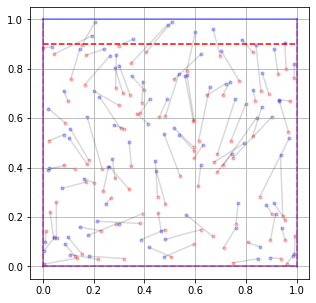

In [46]:
plt.figure(figsize=(5,5))
plt.axhline(y=1, xmin=0.045, xmax=0.955, color='b', alpha=0.5)
plt.axhline(y=0, xmin=0.045, xmax=0.955, color='b', alpha=0.5)
plt.axvline(x=1, ymin=0.045, ymax=0.955, color='b', alpha=0.5)
plt.axvline(x=0, ymin=0.045, ymax=0.955, color='b', alpha=0.5)
plt.axhline(y=1-1/np.sqrt(N), xmin=0.045, xmax=0.955, color='r',ls='--')
plt.axhline(y=0, xmin=0.045, xmax=0.955, color='r', alpha=0.5,ls='--')
plt.axvline(x=1, ymin=0.045, ymax=0.955, color='r', alpha=0.5,ls='--')
plt.axvline(x=0, ymin=0.045, ymax=0.955, color='r', alpha=0.5,ls='--')
for i in range(N):
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.25)
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.25) 
    plt.plot([R1[i,0],B1_piopt[i,0]], [R1[i,1],B1_piopt[i,1]], color='black', alpha=0.15)
plt.grid(True)
plt.savefig('n=100',dpi=600,bbox_inches = 'tight')

In [47]:
N = 1000

B_x = np.random.random(N)
B_y = np.random.random(N)

n = 1100
R0_x = np.random.random(n) 
R0_y = np.random.random(n)

R_x=[]; R_y=[]
m_r=0

for i in range(n):
    if (m_r < N) & (R0_y[i] < (1-1/np.sqrt(N))):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(R1, B1, 'euclidean')**2)
B1_piopt=B1[piopt]
H_opt[0]

1.3895772695541382

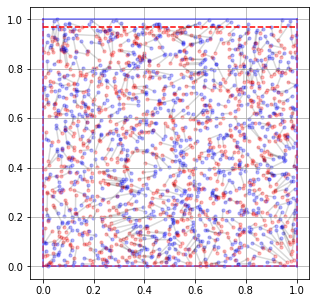

In [48]:
plt.figure(figsize=(5,5))
plt.axhline(y=1, xmin=0.045, xmax=0.955, color='b', alpha=0.5)
plt.axhline(y=0, xmin=0.045, xmax=0.955, color='b', alpha=0.5)
plt.axvline(x=1, ymin=0.045, ymax=0.955, color='b', alpha=0.5)
plt.axvline(x=0, ymin=0.045, ymax=0.955, color='b', alpha=0.5)
plt.axhline(y=1-1/np.sqrt(N), xmin=0.045, xmax=0.955, color='r',ls='--')
plt.axhline(y=0, xmin=0.045, xmax=0.955, color='r', alpha=0.5,ls='--')
plt.axvline(x=1, ymin=0.045, ymax=0.955, color='r', alpha=0.5,ls='--')
plt.axvline(x=0, ymin=0.045, ymax=0.955, color='r', alpha=0.5,ls='--')
for i in range(N):
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.25)
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.25) 
    plt.plot([R1[i,0],B1_piopt[i,0]], [R1[i,1],B1_piopt[i,1]], color='black', alpha=0.15)
plt.grid(True)
plt.savefig('n=1000',dpi=600,bbox_inches = 'tight')

In [60]:
N = 100
n = 300

r_blue = np.sqrt(1/np.pi)
r_red =  np.sqrt(1/np.pi)* np.sqrt(1-1/np.sqrt(N)) 

B0_x = np.random.random(n) * 2 * r - r
B0_y = np.random.random(n) * 2 * r - r
R0_x = np.random.random(n) * 2 * r - r 
R0_y = np.random.random(n) * 2 * r - r 

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i],B0_y[i]) < r_blue):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i],R0_y[i]) < r_red):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]
H_opt[0]

0.9011954665184021

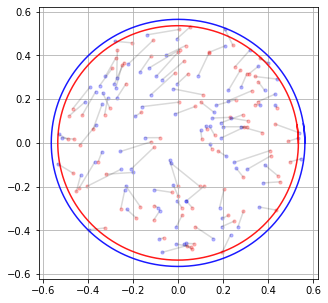

In [61]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r_blue
_y = np.sin(_t*np.pi)*r_blue
plt.plot(_x,_y,'b-',alpha=0.9)
_x = np.cos(_t*np.pi)*r_red
_y = np.sin(_t*np.pi)*r_red
plt.plot(_x,_y,'r-',alpha=0.9)
for i in range(N):
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.25)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.25) 
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.15)
plt.grid(True)
plt.savefig('2:n=100',dpi=600,bbox_inches = 'tight')

In [62]:
N = 1000
n = 1500

r_blue = np.sqrt(1/np.pi)
r_red =  np.sqrt(1/np.pi)* np.sqrt(1-1/np.sqrt(N)) 
r=r_blue
B0_x = np.random.random(n) * 2 * r - r
B0_y = np.random.random(n) * 2 * r - r
R0_x = np.random.random(n) * 2 * r - r 
R0_y = np.random.random(n) * 2 * r - r 

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i],B0_y[i]) < r_blue):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i],R0_y[i]) < r_red):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]
H_opt[0]

1.3738934993743896

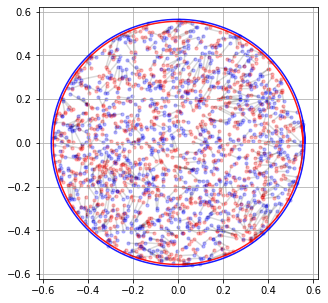

In [63]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r_blue
_y = np.sin(_t*np.pi)*r_blue
plt.plot(_x,_y,'b-',alpha=0.9)
_x = np.cos(_t*np.pi)*r_red
_y = np.sin(_t*np.pi)*r_red
plt.plot(_x,_y,'r-',alpha=0.9)
for i in range(N):
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.25)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.25) 
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.15)
plt.grid(True)
plt.savefig('2:n=1000',dpi=600,bbox_inches = 'tight')

In [64]:
N = 100
n = 200

r_blue = np.sqrt(1/np.pi)
r_red_ =  np.sqrt(1/np.pi)* (np.sqrt(N)**(-1/4))

B0_x = np.random.random(n) * 2 * r_blue - r_blue
B0_y = np.random.random(n) * 2 * r_blue - r_blue
R0_x = np.random.random(n) * 2 * r_blue - r_blue 
R0_y = np.random.random(n) * 2 * r_blue - r_blue 

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i],B0_y[i]) < r_blue):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i],R0_y[i]) > r_red_) & (math.hypot(R0_x[i],R0_y[i]) < r_blue):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]
H_opt[0]

2.102771043777466

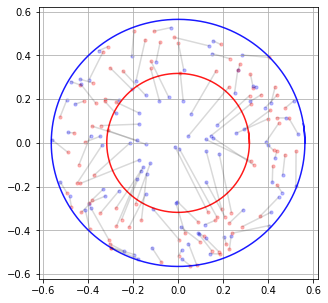

In [65]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r_blue
_y = np.sin(_t*np.pi)*r_blue
plt.plot(_x,_y,'b-',alpha=0.9)
_x = np.cos(_t*np.pi)*r_red_
_y = np.sin(_t*np.pi)*r_red_
plt.plot(_x,_y,'r-',alpha=0.9)
for i in range(N):
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.25)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.25) 
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.15)
plt.grid(True)
plt.savefig('3:n=100',dpi=600,bbox_inches = 'tight')

In [66]:
N = 1000
n = 2000

r_blue = np.sqrt(1/np.pi)
r_red_ =  np.sqrt(1/np.pi)* (np.sqrt(N)**(-1/4))

B0_x = np.random.random(n) * 2 * r_blue - r_blue
B0_y = np.random.random(n) * 2 * r_blue - r_blue
R0_x = np.random.random(n) * 2 * r_blue - r_blue 
R0_y = np.random.random(n) * 2 * r_blue - r_blue 

B_x=[]; B_y=[];R_x=[]; R_y=[]; m_r=0; m_b=0

for i in range(n):
    if (m_b < N) & (math.hypot(B0_x[i],B0_y[i]) < r_blue):
        B_x.append(B0_x[i])
        B_y.append(B0_y[i])
        m_b+=1

for i in range(n):
    if (m_r < N) & (math.hypot(R0_x[i],R0_y[i]) > r_red_) & (math.hypot(R0_x[i],R0_y[i]) < r_blue):
        R_x.append(R0_x[i])
        R_y.append(R0_y[i])
        m_r+=1
        
B1 = np.reshape(np.concatenate((B_x,B_y),axis=0),(2,N)).T
R1 = np.reshape(np.concatenate((R_x,R_y),axis=0),(2,N)).T
dis_star_matrix=np.zeros(shape=(N,N))    
piopt,piopt_int,H_opt = lapjv.lapjv(distance.cdist(B1, R1, 'euclidean')**2)
R1_piopt=R1[piopt]
H_opt[0]

5.835512638092041

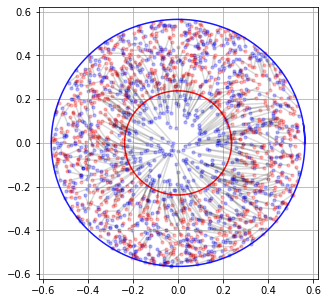

In [67]:
plt.figure(figsize=(5,5))

_t = np.arange(0,2.05,0.001)
_x = np.cos(_t*np.pi)*r_blue
_y = np.sin(_t*np.pi)*r_blue
plt.plot(_x,_y,'b-',alpha=0.9)
_x = np.cos(_t*np.pi)*r_red_
_y = np.sin(_t*np.pi)*r_red_
plt.plot(_x,_y,'r-',alpha=0.9)
for i in range(N):
    plt.scatter(B_x[i], B_y[i], color='b',s=10,alpha=0.25)
    plt.scatter(R_x[i], R_y[i], color='r',s=10,alpha=0.25) 
    plt.plot([B1[i,0],R1_piopt[i,0]], [B1[i,1],R1_piopt[i,1]], color='black', alpha=0.15)
plt.grid(True)
plt.savefig('3:n=1000',dpi=600,bbox_inches = 'tight')